In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.optim import SGD
from tqdm.auto import trange
from topological_layers import RipsLayer

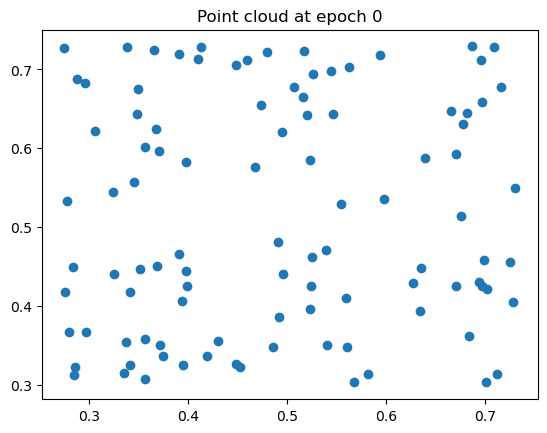

  0%|          | 0/1000 [00:00<?, ?it/s]

In [2]:
points = torch.rand(100, 2)
points = 2. * points - 1.
points = points.clone().detach().requires_grad_(True)
disp_points = torch.sigmoid(points).detach().numpy()

plt.figure()
plt.scatter(disp_points[:, 0], disp_points[:, 1])
plt.title('Point cloud at epoch 0')
plt.show()


rips = RipsLayer(dim=1)
optimizer = SGD([points], lr=0.5, weight_decay=0.0)

epochs = 1000
pbar = trange(epochs)

for epoch in range(epochs):
    optimizer.zero_grad()
    
    pdiag = rips(torch.sigmoid(points))
    loss = torch.pow((pdiag[:, 1] - pdiag[:, 0]), 2)
    loss = -loss.sum()
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        pbar.set_postfix_str(f"Loss: {loss.detach().item():.4f}")
    pbar.update(1)

Text(0.5, 1.0, 'Point cloud at epoch 999')

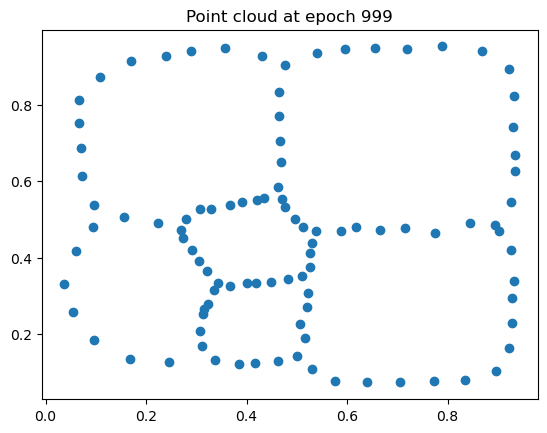

In [3]:
final_points = torch.sigmoid(points).detach().numpy()

plt.figure()
plt.scatter(final_points[:,0], final_points[:,1])
plt.title('Point cloud at epoch ' + str(epoch))